In [ ]:
!pip install kaggle
!pip install seaborn

import os

# Set the path to the Kaggle API credentials

os.environ['KAGGLE_CONFIG_DIR'] = "/content/.kaggle"

!kaggle datasets download -d aryashah2k/breast-ultrasound-images-dataset # Download dataset

!unzip breast-ultrasound-images-dataset.zip # unzip


Dataset URL: https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset
License(s): CC0-1.0
breast-ultrasound-images-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  breast-ultrasound-images-dataset.zip
replace Dataset_BUSI_with_GT/benign/benign (1).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Dataset_BUSI_with_GT/benign/benign (1).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (1)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102).png  
  inflating

We import the dataset and see that there is quite a lot of files to organize. There are subfolders that correspond to categories (benign, normal, malignant). We have to organize the data and put it into a format that can be manipulated before we can clean or preprocess the data.

In [ ]:
# Import the os library

import os
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import tensorflow as tf
import numpy as np


# Change image_dir to the unzipped dataset path

image_dir = '/content/Dataset_BUSI_with_GT'
benign = '/content/Dataset_BUSI_with_GT/benign'
malignant = '/content/Dataset_BUSI_with_GT/malignant'
normal = '/content/Dataset_BUSI_with_GT/normal'
images = [benign, malignant, normal]


In [ ]:
# Get all files in the directory
image_files = []
for folder_path in images:
  files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
  image_files.extend(files)
print(image_files)

['benign (125)_mask.png', 'benign (239)_mask.png', 'benign (378)_mask.png', 'benign (419)_mask.png', 'benign (346)_mask_1.png', 'benign (110).png', 'benign (135)_mask.png', 'benign (427)_mask.png', 'benign (221).png', 'benign (238).png', 'benign (140).png', 'benign (253)_mask.png', 'benign (296)_mask.png', 'benign (338)_mask.png', 'benign (392)_mask.png', 'benign (412)_mask.png', 'benign (192)_mask.png', 'benign (321).png', 'benign (122)_mask.png', 'benign (161).png', 'benign (82).png', 'benign (54).png', 'benign (132).png', 'benign (81)_mask.png', 'benign (34).png', 'benign (129)_mask.png', 'benign (223)_mask.png', 'benign (421)_mask.png', 'benign (230).png', 'benign (208)_mask.png', 'benign (359)_mask.png', 'benign (350).png', 'benign (349)_mask.png', 'benign (57)_mask.png', 'benign (171).png', 'benign (345)_mask.png', 'benign (28).png', 'benign (434).png', 'benign (347).png', 'benign (315)_mask.png', 'benign (93)_mask_1.png', 'benign (300)_mask.png', 'benign (166).png', 'benign (2)_

The array image_files stores the names of all the image files. Names look like 'benign (125)_mask.png', which are added by a for loop checking for the appropriate file extension in the current folder_path. The list is then printed to check progress.

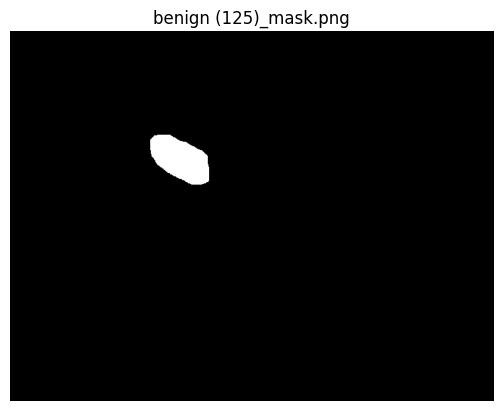

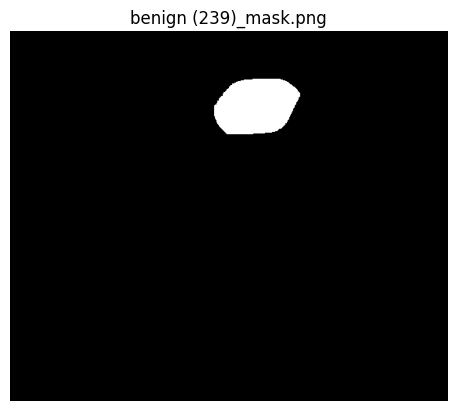

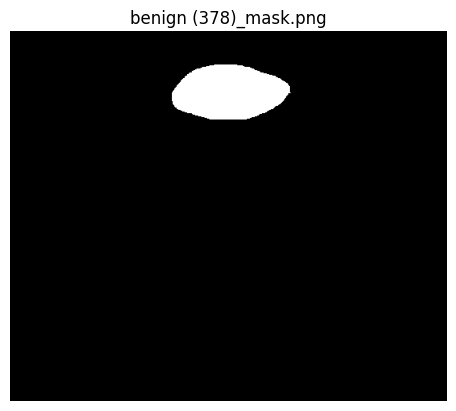

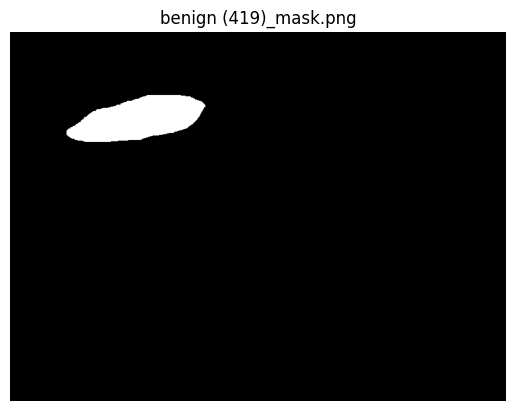

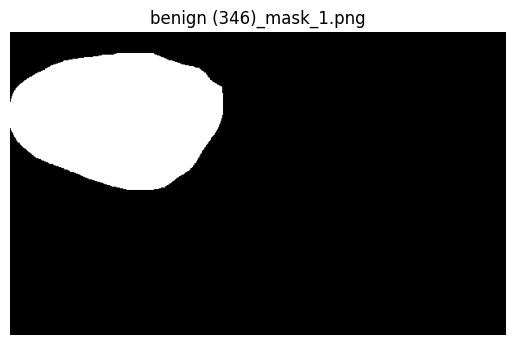

In [ ]:
# Display all images
from tensorflow import keras
import matplotlib.pyplot as plt

for image_file in image_files[:5]:
    # Get the correct folder name from the 'images' list
    for folder_path in images:
        if image_file in os.listdir(folder_path):
            folder_name = os.path.basename(folder_path)
            break

    image_path = os.path.join(folder_path, image_file) # Correct the image path
    image = keras.utils.load_img(image_path)
    # Convert image to display - matplotlib
    plt.imshow(image)
    plt.title(image_file)
    plt.axis('off')  # Turn off axis labels
    plt.show()

Outer for loop: displays the first five images in the list (image_files). Inner for loop and if statment: find correct folder path for the image in the image_file list. The code then joins the image file name and the folder path with image_path = os.path.join(folder_path, image_file). The object image is created and the image is loaded usint keras.utils.load_img. The image is loaded but not yet displayed until plt.imshow(image) is called using matplotlib.pyplot.imshow. The title is set as the name of the image (image_file)

In [ ]:
image_dir = '/content/Dataset_BUSI_with_GT'
subfolders = ["benign", "malignant", "normal"]

In [ ]:
image_path = []
image_label = []
image_data = []
for subfolder in subfolders:
  subfolder_path = os.path.join(image_dir, subfolder)
  # Get all image files in the subfolder
  image_files = [f for f in os.listdir(subfolder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
  for i in image_files:
    image_path.append(os.path.join(subfolder_path, image_file))
    image_label.append(subfolder)
    image_data.append(image_file)


len(image_label)
len(image_data)

1578

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_data, image_label, test_size=0.2, random_state=42)

The code begins to use the path to the image and the subfolders. So far, we are still preprocessing. The nested for loop iterates through the subfolders and image files to populate the lists: image_path, image_label, and image_data. The lengths of these lists are checked against the lengths of the label and data lists.
Before we even start preprocessing, we split the data. As always we use a random_state seed to make our split random and our results more reproducable.

In [ ]:
import numpy as np
X_train = np.array(X_train)
print(X_train.shape)
y_train = np.array(y_train)
print(y_train.shape)
X_test = np.array(X_test)
print(X_test.shape)
y_test = np.array(y_test)
print(y_test.shape)


(1262,)
(1262,)
(316,)
(316,)


In [ ]:
image_files

['normal (92)_mask.png',
 'normal (94).png',
 'normal (16)_mask.png',
 'normal (74)_mask.png',
 'normal (73)_mask.png',
 'normal (129)_mask.png',
 'normal (51).png',
 'normal (45)_mask.png',
 'normal (19).png',
 'normal (46).png',
 'normal (120)_mask.png',
 'normal (34).png',
 'normal (18)_mask.png',
 'normal (117).png',
 'normal (60)_mask.png',
 'normal (97).png',
 'normal (34)_mask.png',
 'normal (89)_mask.png',
 'normal (58)_mask.png',
 'normal (106).png',
 'normal (33)_mask.png',
 'normal (73).png',
 'normal (90)_mask.png',
 'normal (85)_mask.png',
 'normal (113).png',
 'normal (68)_mask.png',
 'normal (3).png',
 'normal (20).png',
 'normal (10).png',
 'normal (81)_mask.png',
 'normal (30).png',
 'normal (102)_mask.png',
 'normal (17)_mask.png',
 'normal (95)_mask.png',
 'normal (3)_mask.png',
 'normal (17).png',
 'normal (7).png',
 'normal (44).png',
 'normal (87).png',
 'normal (16).png',
 'normal (119)_mask.png',
 'normal (60).png',
 'normal (37)_mask.png',
 'normal (5)_mask.png

In [ ]:
import tensorflow as tf

def f1_metric(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.cast(tf.round(y_pred), tf.float32)
  tp = tf.reduce_sum(y_true * y_pred)
  fp = tf.reduce_sum((1 - y_true) * y_pred)
  fn = tf.reduce_sum(y_true * (1 - y_pred))

  precision = tp / (tp + fp + tf.keras.backend.epsilon())
  recall = tp / (tp + fn + tf.keras.backend.epsilon())
  f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
  return f1

In [ ]:
#create an object for the model
cnn = tf.keras.models.Sequential()

In [ ]:
# initialize the model and first hidden layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# max pooling - encoding
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
#second hidden layer and max pooling
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,144 (39.62 KB)

 Trainable params: 10,144 (39.62 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# flatten dimensionality reduction
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
# thrid hidden layer
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
# fourth hidden layer
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [ ]:
# compile with adam as the optimizer, and accuracy as the metric
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy', 'precision', 'recall', f1_metric])

In the code above we use the TensorFlow library to an object for the model, add layers to the CNN model.

Layers:
- Conv2d: convolutional layers for feature extraction
- MaxPool2D: Max pooling layers for downsampling
- Flatten: Flattens the output for the dense layers
-Dropout: drops some of the nodes randomly to decrease risk of overfitting
- Dense: Fully connects layers for classification

Then we use cnn.summary() to see the model layers we have made also called the model architecture.
Finally we compile the model with 'adam' as the optimizer

We are using f1 metric that is calculated directly using Tensorflow operations. This avoids any trouble shooting with numpy arrays within the metric function. We add tf.keras.backend.epsilon() to avoid dividing by zeros

In [ ]:
# Create an ImageDataGenerator for training data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
train_datagen = ImageDataGenerator(rescale=1./255,  # Rescale pixel values
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rotation_range = 20,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   brightness_range = (0.8, 1.2)
                                   )

ImageDataGenerator is something new that came up as we started to build neural networks. ImageDataGenerator is assigned to the object train_datagen.

ImageDataGenerator augments parameters such as:
- rescale = 1./225: Rescales pixel values with a range of [0,1]
- shear_range = 0.2: shearing is tilting the image, so the tilting direction is randomized at 20%.
- zoom_range=0.2: the zooming transformation is also randomized at 20%.
- horizontal_flip=True: randomizes the flipping of images in a horizontal direction.
- rotation_range=20: rotates 20 degrees randomly
- width_shift_range=0.2: 20% witdth shift randomly
- height_shift_range=0.2: 20% height shift randomly

The overall purpose of the ImageDataGenerator is to create variations of the images to prevent overfitting. These transformations also increase the size of the training set, which is sometimes very necessary for small datasets.

This step is the preprocessing before we can form our training set and start training the data. We will use train_datagen to incorporate images inot our model during training.

In [ ]:
# Create an ImageDataGenerator for test data (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Create training data flow
training_set = train_datagen.flow_from_directory(
    image_dir,  # Path to the main image directory
    target_size=(64, 64),  # Resize images to match input shape
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multi-class
    classes=subfolders
)

Found 1578 images belonging to 3 classes.


In [ ]:
# Create test data flow
test_set = test_datagen.flow_from_directory(
    image_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multi-class
    classes=subfolders
)

Found 1578 images belonging to 3 classes.


For the test data, we do not want to augment it. So only rescaling is applied in the line "test_datagen = ImageDataGenerator(rescale=1./255)
For the training set and test set, we use flow_from _directory to create data generators for both sets

The parameters are:
- image_dir: directory containing the images
- target_size: size for the resized images
- batch_size: number of images to process in each batch
- class_mode: classification problem type
- classes: classes from the list of subfolder names

In [ ]:
# Fit the model - training
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=5, verbose=1)
cnn.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=25,
    validation_data=test_set,
    validation_steps=len(test_set),
    callbacks=[lr_scheduler],
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 48s 754ms/step - accuracy: 0.5302 - f1_metric: 0.3175 - loss: 0.9775 - precision: 0.5710 - recall: 0.2622 - val_accuracy: 0.5837 - val_f1_metric: 0.5825 - val_loss: 0.8208 - val_precision: 0.6905 - val_recall: 0.5089 - learning_rate: 0.0010
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - f1_metric: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/25


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,f1_metric,loss,precision,recall,learning_rate.
  callback.on_epoch_end(epoch, logs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 69s 561ms/step - accuracy: 0.6055 - f1_metric: 0.5435 - loss: 0.8299 - precision: 0.6751 - recall: 0.4683 - val_accuracy: 0.6255 - val_f1_metric: 0.6229 - val_loss: 0.8209 - val_precision: 0.6267 - val_recall: 0.6255 - learning_rate: 0.0010
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - f1_metric: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 558ms/step - accuracy: 0.6578 - f1_metric: 0.6480 - loss: 0.7535 - precision: 0.6967 - recall: 0.6090 - val_accuracy: 0.6673 - val_f1_metric: 0.6693 - val_loss: 0.7365 - val_precision: 0.6677 - val_recall: 0.6673 - learning_rate: 0.0010
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - f1_metric: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 558ms/step - accuracy: 0.6993 - f1_metric

We are now ready to train the CNN model.
We use the training_set that we just created.
We set the other parameters:
**steps_per_epoch**: number of batches to process in each epoch, the total number of training samples divided by the batch size
**epochs**: numbner of times to iterate over the entire training dataset
**validation_data**: test_set we just created used to validate the training
**validation_steps**: batches to process validation in each epoch.

In [ ]:
#make single prediction
from keras.preprocessing import image

In [ ]:
#make single prediction
from keras.preprocessing import image
import numpy as np

# Assuming 'image_path' from earlier contains the paths to your images
# Choose an image path from the list
image_file_path = image_path[0] # for example, choose the first image

test_image = image.load_img(image_file_path, target_size = (64, 64)) # Load using the path
test_image = image.img_to_array(test_image)

# If you want to make a prediction, make sure the image is in the correct format
test_image = np.expand_dims(test_image, axis=0) # add a batch dimension
result = cnn.predict(test_image) # Now you can predict
# ... (Rest of your code for prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


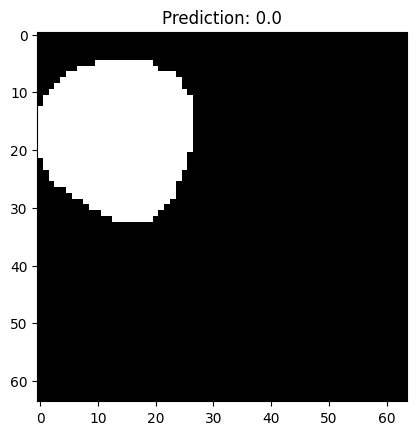

In [ ]:
#make single prediction
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt # Import pyplot for imshow

# Assuming 'image_path' from earlier contains the paths to your images
# Choose an image path from the list
image_file_path = image_path[0] # for example, choose the first image

test_image = image.load_img(image_file_path, target_size = (64, 64)) # Load using the path
test_image = image.img_to_array(test_image)

# If you want to make a prediction, make sure the image is in the correct format
test_image = np.expand_dims(test_image, axis=0) # add a batch dimension
result = cnn.predict(test_image) # Now you can predict

# Display the image using plt.imshow
plt.imshow(test_image[0]) # Display the first image in the batch
plt.title("Prediction: " + str(result[0][0]))  # Add a title with the prediction
plt.show()
# ... (Rest of your code for prediction)

We select an image path for prediction with image_file_path. Then test_image loads the image, converts it to an array and adds a batch dimension
The result is predicts the test image with the trained CNN model

In [ ]:
training_set.class_indices

{'benign': 0, 'malignant': 1, 'normal': 2}

In [ ]:
if result[0][0] == 1:
  prediction = 'benign',
elif result[0][0] == 2:
  prediction = 'normal'
else:
  prediction = 'malignant'

In [ ]:
print(prediction)

malignant


To access the dictionary that maps the class names (benign, normal, malignant) to the indicies of the dictionary they are stored in, we use training_set.class_indicies.

We then have a chain of if, elif, else statements to interpret those indicies and return the predicted class through the variable called prediction.

In [ ]:
loss, accuracy, precision, recall, f1 = cnn.evaluate(test_set, steps=len(test_set))
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-score:", f1)

50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - accuracy: 0.7594 - f1_metric: 0.7534 - loss: 0.5448 - precision: 0.7885 - recall: 0.7220
Test Loss: 0.5663030743598938
Test Accuracy: 0.7439796924591064
Test Precision: 0.772946834564209
Test Recall: 0.7097591757774353
Test F1-score: 0.7383532524108887


50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 240ms/step


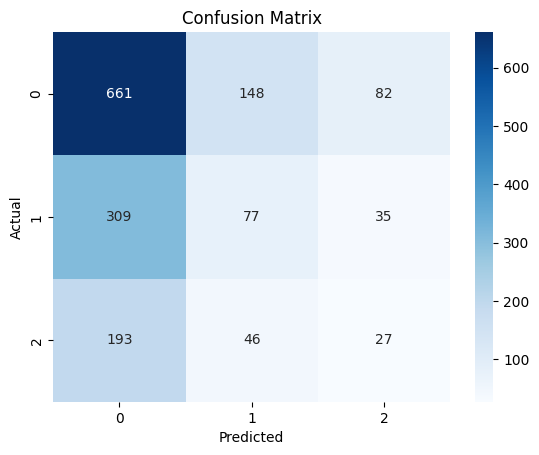

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = cnn.predict(test_set, steps=len(test_set))
y_pred_classes = np.argmax(y_pred, axis=1) # Convert pto class labels
cm = confusion_matrix(test_set.classes, y_pred_classes)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Analysis:

Accuracy: 74.4% The test accuracy is pretty good. The model is correctly classifying 74% of images in the test set.

Precision: 77.3% precise. Images predicted to belong to a specific class are about 77.3% correct.

Recall: 71.0% of the actual instances for each class are correctly identified

F1: 73.8% this number represents the difference between precision and recall.

Loss: 0.566% the loss function is actually quite low for multiple classification

The model's performance has a decent accuracy and demonstrates a good balance between precision (higher threshold) and recall(sensitivity, lower threshold). The appropriate loss function and output format is crucial and took some trial and error.

References

Dropout:
- https://saturncloud.io/blog/where-to-add-dropout-in-neural-network/#2

F1-score:
- https://www.tensorflow.org/addons/api_docs/python/tfa/metrics/F1Score
- https://stackoverflow.com/questions/68596302/f1-score-metric-per-class-in-tensorflow

ImageDataGenerator:
- https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

ReduceLROnPlateau:
- https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau

Loss Function, multiclass:
- https://discuss.pytorch.org/t/loss-function-for-multi-class-with-probabilities-as-output/60866
- https://medium.com/@nghihuynh_37300/understanding-loss-functions-for-classification-81c19ee72c2a
- https://stackoverflow.com/questions/59336899/which-loss-function-and-metrics-to-use-for-multi-label-classification-with-very

Metrics:
- https://scikit-learn.org/dev/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html
- https://www.kaggle.com/code/kmkarakaya/multi-label-model-evaluation
- https://learn.microsoft.com/en-us/azure/machine-learning/how-to-understand-automated-ml?view=azureml-api-2
- https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall
- https://arize.com/blog-course/f1-score/
- https://stackoverflow.com/questions/55984768/i-am-having-trouble-calculating-the-accuracy-recall-precision-and-f1-score-for
- https://www.labelf.ai/blog/what-is-accuracy-precision-recall-and-f1-score
- https://medium.com/analytics-vidhya/precision-recall-tradeoff-79e892d43134

